In [2]:
import sys
sys.path[0:0] = ['../..','../../3rdparty',
                '../../..','../../../3rdparty',
                 '../../../..','../../../../3rdparty'
                ] # Put these at the head of the search path

from jove.StateNameSanitizers import *
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accepts_nfa)
help(nfa2dfa)
help(n2d)
help(inSets)
help(rev_dfa)
help(min_dfa_brz)

You may use any of these help commands:
help(re2nfa)

You may use any of these help commands:
help(RE2Str)
help(mk_gnfa)
help(mk_gnfa_from_D)
help(dfa2nfa)
help(del_gn

** IMPORTANT NOTE: RESTART AND RUN ALL CELLS SO THAT THE STATES GET NUMBERED
CORRECTLY AS PER THE EMBEDDED DESCRIPTIONS IN THIS NOTEBOOK **

In [3]:
# Reset the state numbering counter
ResetStNum()

0

 # BDDs: Efficient Data Stuctures for Boolean Function Representation
 
 Boolean functions occur widely in computer science. In order to represent and manipulate large Boolean
 functions, one must choose good data structures. A data structure called BDDs often works well. In fact,
 Prof. Donald Knuth [has said](https://en.wikipedia.org/wiki/Binary_decision_diagram)  in his lecture
 _Fun With Binary Decision Diagrams_  that BDDs are"one of the only really fundamental data structures 
 that came out in the last twenty-five years."
 
 We are studying BDDs in our book because BDDs are nothing but a small variant of 
 minimal DFAs for a simple language that one
 can obtain from a given Boolean function. Given that we have studied minimal
 DFAs extensively, it looks quite opportune to point out yet another amazing connection
 in computer science -- specifically, the study of Boolean functions being another application of minimal DFA.
 
 In this narrative, we will cover all the required basics one by one; we assume very little by the way of
 prerequisites.

## Boolean functions, and viewing their on-sets as formal languages

A Boolean function f(x1,x0) admits a truth-table of four entries with the
truth-table output (called "personality") defining the function for the
standard order of enumeration of x0 and x1. For AND, taking the inputs 
x1,x0 through 00, 01, 10 and 11, the outputs of AND are 0001 (the string
0001 is its personality). The personality has $2^2$ bits (for a $2$-input
Boolean function). There are $2^{2^2} = 16$ personalities for a $2$-input
Boolean function. Each personality defines a Boolean function; thus, there
are $16$ possible Boolean functions.

Here are personalities of some common functions: 

```
 Inputs  Personalities
----------------------
| x1 x0 | OR XOR NOR |
----------------------
| 0  0  | 0  0   1   |
| 0  1  | 1  1   0   |
| 1  0  | 1  1   0   |
| 1  1  | 1  0   0   |
----------------------
```

In general, an $N$-input truth-table has $2^N$ 
truth-table rows and a personality of length $2^N$, thus admitting $2^{2^N}$
Boolean functions of $N$ inputs.

It is impractical (and insane) to be building truth-tables for Boolean functions with
many inputs. Even a $64$-input Boolean function will have a truth-table of $2^{64}$ rows.
Suppose we want to even print one such truth-table. At 80 rows printed per sheet of paper and
five grams of weight per sheet, we will need 46-billion tons of paper to print. Even a 
newborn human baby would be dead of ripe old age by the time this many pages are printed.

Yet, there is a method by which _many_ 64-input Boolean functions can be exactly
represented using alternative representations than truth-tables. (To emphasize this a bit,
not all functions can be so represented, but it works for many Boolean functions occurring in practice.)

One such representation is called a Binary Decision Diagram.

Binary Decision Diagrams (BDD) are graph structures that summarize a Boolean function's
on-sets (sets of inputs for which the function is true). The on-set of the AND function
is {11} while that for the OR function is {01, 10, 11}.

One can read on-sets as a formal language. The language of an OR-gate is thus {01, 10, 11}
(its on-set) and the language of (the on-set of) an AND-gate is {11}.

## Minimal DFA for the on-set of an XOR and OR

In order to drive the point home with respect to how minimal DFA can be made to encode
the on-set of functions, let us build a minimal DFA for the language of XOR's on-set and also OR's on-set.

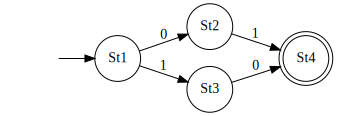

In [4]:
L_XOR = "(01+10)"
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(L_XOR))), STATENAME_MAXSIZE=4)

In [4]:
doXOR = dotObj_dfa(min_dfa(nfa2dfa(re2nfa(L_XOR))), STATENAME_MAXSIZE=4)

Generating LALR tables


In [5]:
doXOR.render('/Users/ganesh/repos/atmm/book/CH17/XORdfaNoBH.dot')

'/Users/ganesh/repos/atmm/book/CH17/XORdfaNoBH.dot.pdf'

It is easy to see that both 01 and 10 lead to the final state, namely St8, whereas 00 and 11 go to BH. Also excessively long inputs (of length more than two) also go to BH.

Generating LALR tables


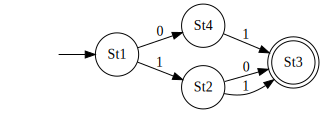

In [6]:
L_OR = "(01+10+11)"
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(L_OR))), STATENAME_MAXSIZE=4)

In [7]:
doOR = dotObj_dfa(min_dfa(nfa2dfa(re2nfa(L_OR))), STATENAME_MAXSIZE=4)

Generating LALR tables


In [8]:
doOR.render('/Users/ganesh/repos/atmm/book/CH17/ORdfaNoBH.dot')

'/Users/ganesh/repos/atmm/book/CH17/ORdfaNoBH.dot.pdf'

One can build BDDs corresponding to these functions as will be describe in the book. Also see the section at the end on building BDDs.

It is easy to compare the BDDs to these minimal DFA and note the following:

* The minimal DFA keep edges marked 0/1 . The BDD eliminates such "redundant decoding" edges, short-circuiting the graph at those edges

* The minimal DFA shows what happens when strings with excessive lengths are fed. The BDD stops with a ``0'' node or a ``1'' node at the leaf, and does not carry on to show what happens when an excessively long string is fed.

* The BDD does show the BH state as the ``0'' node.

So far, the advantage of minimal DFA (or BDD) over truth-tables hasn't been quite apparent. We now proceed to demonstrate that for larger functions, with the right decoding order of the variables, BDDs (and minimal DFA) can indeed be far more compact (whereas truth-tables are guaranteed exponential)

## Building minimal DFA for the language of on-sets

Suppose there is a 6-input Boolean function modeling a magnitude comparator that 
compares the binary value coming in through input ports x2,x1,x0 against the binary
value coming through ports y2,y1,y0.

The function is "<" where "A < B" means the usual "less than" comparison.

More specifically, we write "x2,x1,x0 < y2,y1,y0" and we interpret the word x2,x1,x0
using the standard positional binary notation (likewise also for y2,y1,y0).

Here are some examples:

* 000 < 001  because 0 is < 1  (and 0 is encoded in binary as 000 and 1 as 001)

* 010 < 110  because 2 is < 6  (and 2 is encoded as 010 while 6 is encoded as 110)

* 110 < 111  because 6 < 7

```
Here is a circuit schematic of such a comparator:

      --------
      |      |
x2 -->|      |
x1 -->|      |
x0 -->|      |
      |   <  |--> Output
y2 -->|      |
y1 -->|      |
y0 -->|      |
      |      |
      --------


```

Let us now define a language of strings of length 6 representing the values of 
x2,x1,x0,y2,y1,y0 written adjacently, such that for those x,y values, the function
outputs a 1. Call this language L.

For instance, L contains 010101 because 010 is < 101 (i.e. 2 < 5)

The reader may verify that this is the full L language written out as a regular expression.
Of the $2^6 = 64$ strings, we have 28 strings in L's language. The regular expression for L is called R, and is defined below:

```
R =     "(000001+000011+000111+001011+001111+\
          010011+010111+011111+100101+100111+\
          101111+110111+000010+000101+000110+\
          001010+001101+001110+010101+010110+\
          011101+011110+100110+101110+000100+\
          001100+010100+011100)"
```

Let us build a minimal DFA for R.

Generating LALR tables


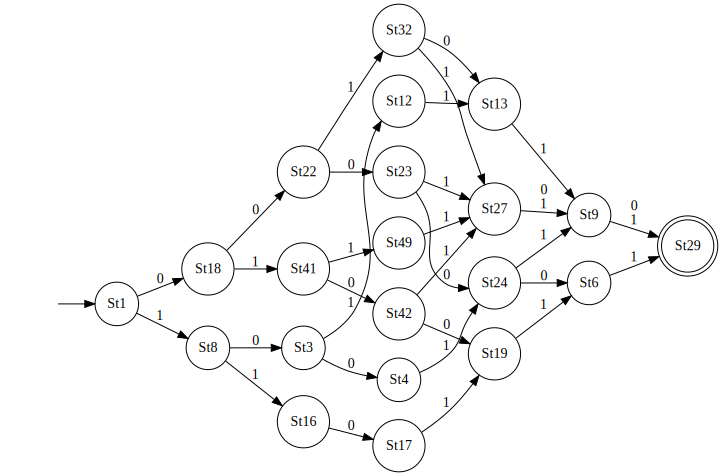

In [9]:
R =     "(000001+000011+000111+001011+001111+\
          010011+010111+011111+100101+100111+\
          101111+110111+000010+000101+000110+\
          001010+001101+001110+010101+010110+\
          011101+011110+100110+101110+000100+\
          001100+010100+011100)"
N      = re2nfa(R)
Dbloat = nfa2dfa(N)
D      = min_dfa(Dbloat)
doBadLTNoBH = dotObj_dfa(D, FuseEdges=True)
doBadLTNoBH

In [10]:
doBadLTNoBH.render('/Users/ganesh/repos/atmm/book/CH17/doBadLTNoBH.dot')

'/Users/ganesh/repos/atmm/book/CH17/doBadLTNoBH.dot.pdf'

This machine appears to be rather large -- in fact exponential in the x2,x1,x0 bits (those are the first three bits to arrive at this machine, and the machine grows exponentially with respect to these inputs). It then collapses soon as soon as the y bits come in.

Size aside, this DFA acts as a representation of the "<" function. Take the starting state: all paths from it leading to the final state are in the on-set of this function; any path of length six that goes to the BH state is in the off-set of this function. Strings of length greater than six can be entertained, but they have no meaning with respect to our problem that involves only six variables. 

Let us take an example. String 001100 is accepted. Here is the accepting path:

* St1 --0--> St18 --0--> St22 --1--> St32 --1--> St27 --0--> St9 --0--> St35 

The rejecting paths include strings of length six that are not in the language being modeled, or strings of higher lengths than six. These strings cause the execution to enter the "black hole" state (that is not shown in our diagrams).
 
Also notice that the _nodes_ in this minimal automaton graph represent Boolean functions. Thus, state St1 is a function of all the six input bits. States St18 and St8 are functions of the five bits x1,x0,y2,y1,y0. In fact, the further we go away from the initial state, the lesser the remaining bits are in deciding the "fate of the function". 

Take state St18 which is one step away from the initial state. All paths leading to the final state represent the on-set of a Boolean function of inputs x1,x0,y2,y1,y0. Paths leading to state BH (not shown) are in the off-set (not shown)

But suppose another astute person jumps in and tells us that it will be a small minimal DFA if we were to have considered strings x2,y2,x1,y1,x0,y0 to be in the language. That is, we mix the bits (and call the language Lmix, and the regular expression Rmix).

We have the following Rmix.

In [11]:
Rmix =  "(000001+000111+001101+011111+110001+\
          110111+111101+000101+000110+010111+\
          011011+011101+011110+110101+110110+\
          000100+010011+010101+010110+011001+\
          011010+011100+110100+010001+010010+\
          010100+011000+010000)" 

We still have 28 entries, but the entries now represent x2,y2,x1,y1,x0,y0. For instance,
take the fifth member of Rmix which is 110001. This means 100 < 101 which means 4 < 5, which is true. Let us now build a minimum DFA for Rmix.

In [12]:
Dmix = min_dfa(nfa2dfa(re2nfa(Rmix)))

Generating LALR tables


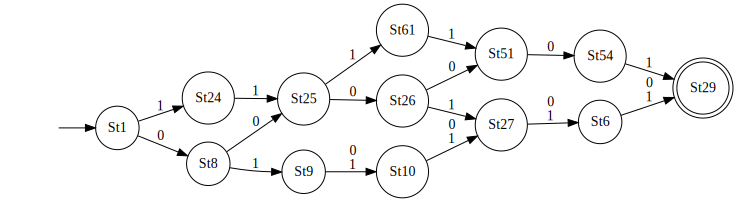

In [13]:
doGoodLTNoBH = dotObj_dfa(Dmix, FuseEdges=True)
doGoodLTNoBH

In [14]:
doGoodLTNoBH.render('/Users/ganesh/repos/atmm/book/CH17/doGoodLTNoBH.dot')

'/Users/ganesh/repos/atmm/book/CH17/doGoodLTNoBH.dot.pdf'

We see that this minimal DFA is much smaller. The reason is that as soon as an x2 comes, a y2 bit is fed. In a positional encoding of binary numbers, this allows a DFA to immediately decide whether X < Y for X = x2x1x0 and Y = y2y1y0. 

The DFA that sees x2,x1,x0,y2,y1,y0 on the other hand cannot take a decision until bit y2 comes along. This means that this DFA has to build a full tree after seeing merely x2,x1,x0 and this would already be exponential in size. 

This machine appears to be linearly sized w.r.t. the number of inputs. 

This DFA also acts as a representation of the "<" function.  State St1 is a function of all the six input bits. States St2 and St3 are functions of the five bits y2,x1,y1,x0,y0. In fact, the further we go away from the initial state, the lesser the remaining bits are in deciding the "fate of the function". But the bits come in an interleaved manner. 

Take St2 as representing a Boolean function: paths from it to the final state represent the on-set of a Boolean function of inputs y2,x1,y1,x0,y0 and paths leading to BH are in the off-set.


## Boolean subfunctions in the DFA

Each state of the minimal DFA obtained in this manner represents a Boolean function.


# Building BDDs from minimal DFA for on-set languages

A BDD is obtained from a minimal DFA by following some "cleanup" steps:

* When a 0,1 jump is made from one state to the other, short-circuit the jump
 
  - This means that whether a 0 or a 1 comes, we go to the same state. That is 
    a redundant binary decoding situation
    
* When we see two distinct nodes represent the same Boolean function, merge them

   - This merging step is already being done during state minimization
   
Let us obtain BDDs using our BDD tool and then compare it with our minimal DFA to get an idea of what these optmizations do.

In [15]:
import webbrowser

# This is the URL for our BDD tool that can be opened on a new tab
url = 'http://formal.cs.utah.edu:8080/pbl/BDD.php'
webbrowser.open(url)

True

```
1) The BDD for XOR can be drawn as follows:

Var_Order : x1 x0
 
Main_Exp : x1 XOR x0


2) The BDD for OR can be drawn as follows:

Var_Order : x1 x0
 
Main_Exp : x1 XOR x0



3) The BDD for the comparator that uses the inefficient variable order can be drawn as follows.

#3-bit comparator with the inefficient variable order
#First declare the variables and specify variable orderings

Var_Order : x2 x1 x0 y2 y1 y0
 
Main_Exp : (!x2 & y2) | (x2 <=> y2) &  ( (!x1 & y1) | (x1 <=> y1) & (!x0 & y0) )

4) The BDD for the comparator that uses the better variable order is easily obtained: simply change Var_Order

Var_Order : x2 y2 x1 y1 x0 y0
```

You will be able to see these BDDs and be able to relate them to the aforesaid DFA.
This material will be covered in Chapter 17 of our book.

** END **